# Climate Prediction Results

In [1]:
import pandas as pd
import os
import sys
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor



In [2]:
# Add the folder to the Python path

os.chdir("../")
# change working directory to project's root path
print(os.getcwd())

folder_path = os.path.abspath("functions/") #INPUT_PATH)#'path_to_your_folder')  # Replace with the actual folder path
sys.path.insert(0, folder_path)

from Predictions import (
    get_info_experiment,
    summarize_best_results_by_index,
    plot_average_best_results,
    plot_best_results_per_season,
    PredictionExperiment
)

c:\Users\marti\Desktop\data\hw_extra


c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [3]:
def train_single_label_exp(exp_id, season, label_interest, model_exp, name_model, region):
    labels_to_remove = ["HWN", "HWF", "HWD", "HWA", "HWM"]
    labels_to_remove.remove(label_interest)
    display(get_info_experiment(exp_id, metadata_exp_path=metadata_exp_path, metadata_index_path=my_indices_path, extra_indices_path=extra_indices_path))
    data = {season: pd.read_parquet(f"data/climate_features/{region}/predictor_{id}_{season}.parquet")}
    data[season].drop(columns=labels_to_remove, inplace=True)
    experiment_1 = PredictionExperiment(data, [label_interest], [model_exp], [name_model], 5, id)
    experiment_1.execute_experiment()
    experiment_1.get_metrics("r2", stage="TSCV", show=False)
    experiment_1.get_metrics("mape", stage="TSCV", show=False)
    display(experiment_1.results)
    return experiment_1

def display_full(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        display(df)

In [4]:
my_indices_path = "data/my_indices/metadata.csv"
extra_indices_path = "data/extra_indices/metadata.csv"

## California

In [5]:
region = "california"
metadata_exp_path = f"data/climate_features/{region}/metadata.csv"
metadata = pd.read_csv(metadata_exp_path)
metadata.rename(columns={"id":"id_data"}, inplace=True)
metadata

,id_data,filename,season,indices
0,6e47cb06,predictor_6e47cb06_1.parquet,1,df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...
1,6e47cb06,predictor_6e47cb06_2.parquet,2,df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...
2,6e47cb06,predictor_6e47cb06_3.parquet,3,df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...
3,6e47cb06,predictor_6e47cb06_4.parquet,4,df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...
4,6e47cb06,predictor_6e47cb06_5.parquet,5,df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...
5,6e47cb06,predictor_6e47cb06_6.parquet,6,df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...
6,6e47cb06,predictor_6e47cb06_7.parquet,7,df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...
7,6e47cb06,predictor_6e47cb06_8.parquet,8,df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...
8,6e47cb06,predictor_6e47cb06_9.parquet,9,df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...
9,6e47cb06,predictor_6e47cb06_10.parquet,10,df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...


In [6]:
results = pd.read_csv(f"data/climate_results/{region}_results/results.csv")
results

,model,season,metric,stage,HWN,HWF,HWD,HWM,HWA,Average,id_data
0,Linear,1,r2,prediction,-1.642946,-0.451826,-0.356029,-0.574733,-0.555294,-0.716166,6e47cb06
1,RF5,1,r2,prediction,0.061589,0.188855,-0.146274,-0.261316,-0.245859,-0.080601,6e47cb06
2,RF10,1,r2,prediction,-0.206871,0.027445,-0.177618,-0.240291,-0.350948,-0.189657,6e47cb06
3,SVR-rbf,1,r2,prediction,-0.597662,-0.571592,-0.680761,-0.699400,-0.681742,-0.646231,6e47cb06
4,XGB10,1,r2,prediction,-0.486964,-0.408386,-0.011742,-0.344260,-0.282488,-0.306768,6e47cb06
...,...,...,...,...,...,...,...,...,...,...,...
4771,GRU16,12,mape,TSCV,1.313542,1.137082,1.200800,1.111557,1.860089,1.324614,5cb3fa02
4772,SRNN16,12,mape,TSCV,1.098477,0.884873,0.925097,1.047689,1.632333,1.117694,5cb3fa02
4773,SLSTM16,12,mape,TSCV,1.268639,0.866844,0.891098,1.081270,1.376183,1.096807,5cb3fa02
4774,CNNRNN16,12,mape,TSCV,1.285060,0.831263,1.030531,1.045756,1.535899,1.145702,5cb3fa02


In [7]:
# Example usage
summary_r2 = summarize_best_results_by_index(results, metadata, metric="r2", top_n=2, stage="prediction")
summary_mape = summarize_best_results_by_index(results, metadata, metric="mape", top_n=2, stage="prediction")
summary_cv_r2 = summarize_best_results_by_index(results, metadata, metric="r2", top_n=2, stage="CV")
summary_cv_mape = summarize_best_results_by_index(results, metadata, metric="mape", top_n=2, stage="CV")
summary_tscv_r2 = summarize_best_results_by_index(results, metadata, metric="r2", top_n=2, stage="TSCV")
summary_tscv_mape = summarize_best_results_by_index(results, metadata, metric="mape", top_n=2, stage="TSCV")

In [8]:
summary_tscv_r2

,model,season,id_data,index,best_value,filename,indices
0,CNNRNN16,7,5cb3fa02,Average,0.671888,predictor_5cb3fa02_7.parquet,fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...
1,SRNN16,5,5cb3fa02,Average,0.632354,predictor_5cb3fa02_5.parquet,fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...
2,CNNRNN16,7,5cb3fa02,HWA,0.600327,predictor_5cb3fa02_7.parquet,fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...
3,SLSTM16,7,5cb3fa02,HWA,0.577109,predictor_5cb3fa02_7.parquet,fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...
4,CNNRNN16,7,5cb3fa02,HWD,0.714737,predictor_5cb3fa02_7.parquet,fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...
5,SRNN16,5,5cb3fa02,HWD,0.704682,predictor_5cb3fa02_5.parquet,fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...
6,RNN16,5,5cb3fa02,HWF,0.706816,predictor_5cb3fa02_5.parquet,fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...
7,SLSTM16,9,5cb3fa02,HWF,0.698622,predictor_5cb3fa02_9.parquet,fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...
8,CNNRNN16,7,5cb3fa02,HWM,0.657651,predictor_5cb3fa02_7.parquet,fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...
9,CNNRNN16,2,6e47cb06,HWM,0.656136,predictor_6e47cb06_2.parquet,df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...


In [9]:
cv_r2_seasons = {}
cv_mape_seasons = {}
r2_seasons = {}
mape_seasons = {}
tscv_r2_seasons = {}
tscv_mape_seasons = {}
for i in range(13):
    results_season = results[results["season"]==i]
    cv_r2_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="r2",stage="CV" , top_n=1)
    tscv_r2_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="r2",stage="TSCV" , top_n=1)
    r2_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="r2",stage="prediction", top_n=1)
    mape_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mape",stage="prediction", top_n=1)
    cv_mape_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mape",stage="CV", top_n=1)
    tscv_mape_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mape",stage="TSCV", top_n=1)

cv_r2_seasons = pd.concat(list(cv_r2_seasons.values()))
cv_mape_seasons = pd.concat(list(cv_mape_seasons.values()))
tscv_r2_seasons = pd.concat(list(tscv_r2_seasons.values()))
tscv_mape_seasons = pd.concat(list(tscv_mape_seasons.values()))
r2_seasons = pd.concat(list(r2_seasons.values()))
mape_seasons = pd.concat(list(mape_seasons.values()))


In [10]:
display_full(tscv_r2_seasons)

,model,index,best_value,id_data,filename,season,indices
0,SLSTM16,Average,0.334779,5cb3fa02,predictor_5cb3fa02_1.parquet,1,fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...
1,SLSTM16,HWA,0.348498,5cb3fa02,predictor_5cb3fa02_1.parquet,1,fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...
2,SLSTM16,HWD,0.130104,5cb3fa02,predictor_5cb3fa02_1.parquet,1,fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...
3,SLSTM16,HWF,0.425077,5cb3fa02,predictor_5cb3fa02_1.parquet,1,fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...
4,GRU16,HWM,0.340938,5cb3fa02,predictor_5cb3fa02_1.parquet,1,fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...
5,GRU16,HWN,0.461708,5cb3fa02,predictor_5cb3fa02_1.parquet,1,fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...
0,CNNRNN16,Average,0.472202,6e47cb06,predictor_6e47cb06_2.parquet,2,df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...
1,CNNRNN16,HWA,0.560880,6e47cb06,predictor_6e47cb06_2.parquet,2,df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...
2,GRU16,HWD,0.406602,6e47cb06,predictor_6e47cb06_2.parquet,2,df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...
3,CNNRNN16,HWF,0.354069,5cb3fa02,predictor_5cb3fa02_2.parquet,2,fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...


## Analyze good results by experiment

In [11]:
id = "5cb3fa02"
season = 10
exp = train_single_label_exp(id, season, "HWD",RandomForestRegressor(random_state=42, n_estimators=15), "RF15", "california")

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
fde0e327,index_fde0e327.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
340e2882,index_340e2882.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
f27c56aa,index_f27c56aa.parquet,anom,1,SP,236|246|37.5|43,1980-2010,1972-2022
5b9237bf,index_5b9237bf.parquet,anom,1,SP,236|246|32|37.5,1980-2010,1972-2022
46fa0cb8,index_46fa0cb8.parquet,max,1,SP,190|235|15|43,NoRef,1972-2022
63520cd8,index_63520cd8.parquet,anom,1,U10,236|246|32|43,1980-2010,1972-2022
PDO,pdo.dat,EOF,1,SSTAnom,110|260|20|70,unknown,1972-2022
ONI,oni.txt,Anom,3,SST,190|240|-5|5,30yearsliding,1972-2022
SAM,sam.txt,DifAnom,1,SLP,X|X|-65|-40,1981-2010,1972-2022


c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,Model,Season,Metric,Stage,HWD,Average
0,RF15,10,r2,TSCV,0.312670,0.312670
0,RF15,10,mape,TSCV,0.826744,0.826744


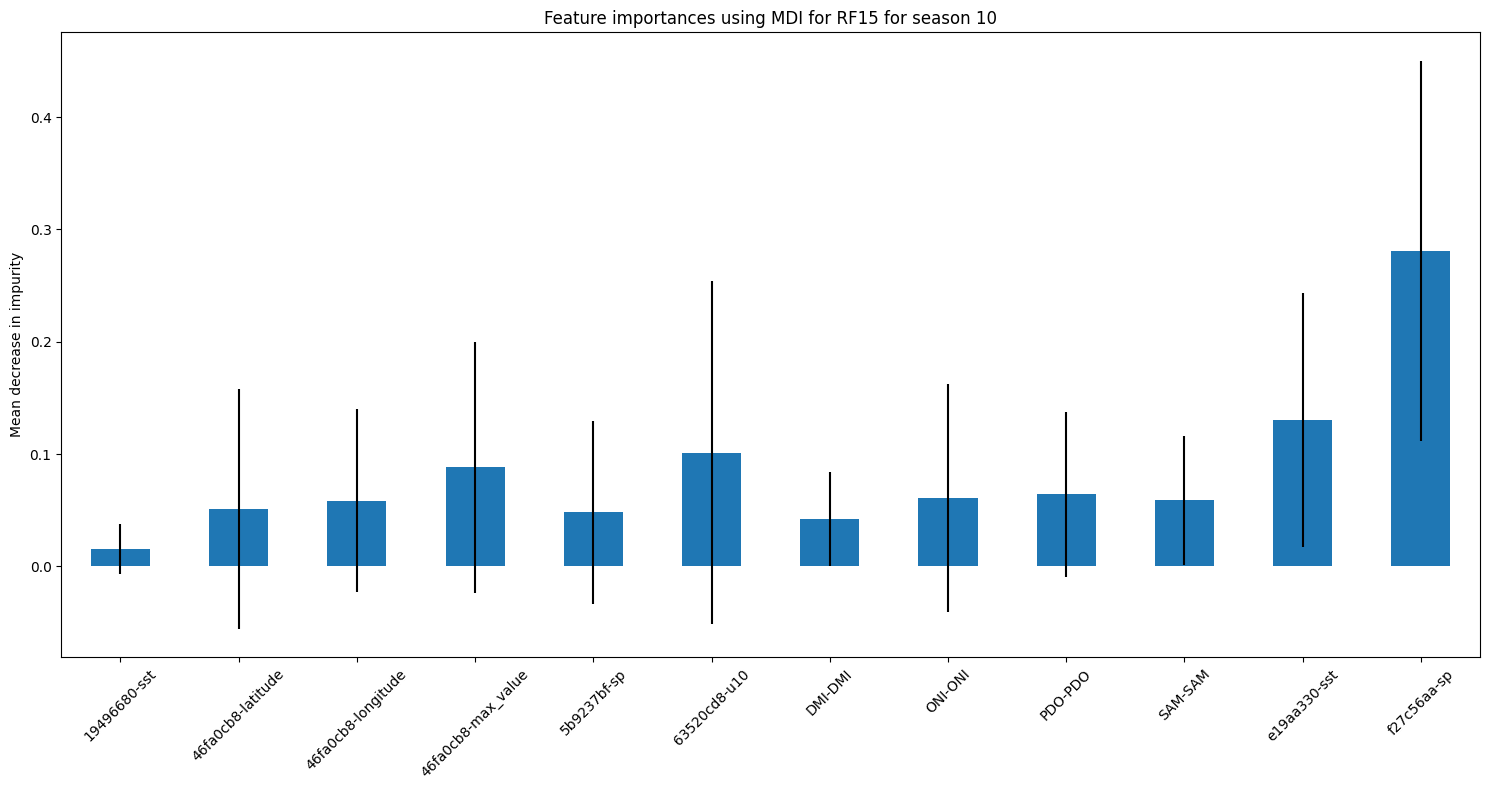

In [12]:
exp.get_feature_importance(season, "RF15", method="mdi")

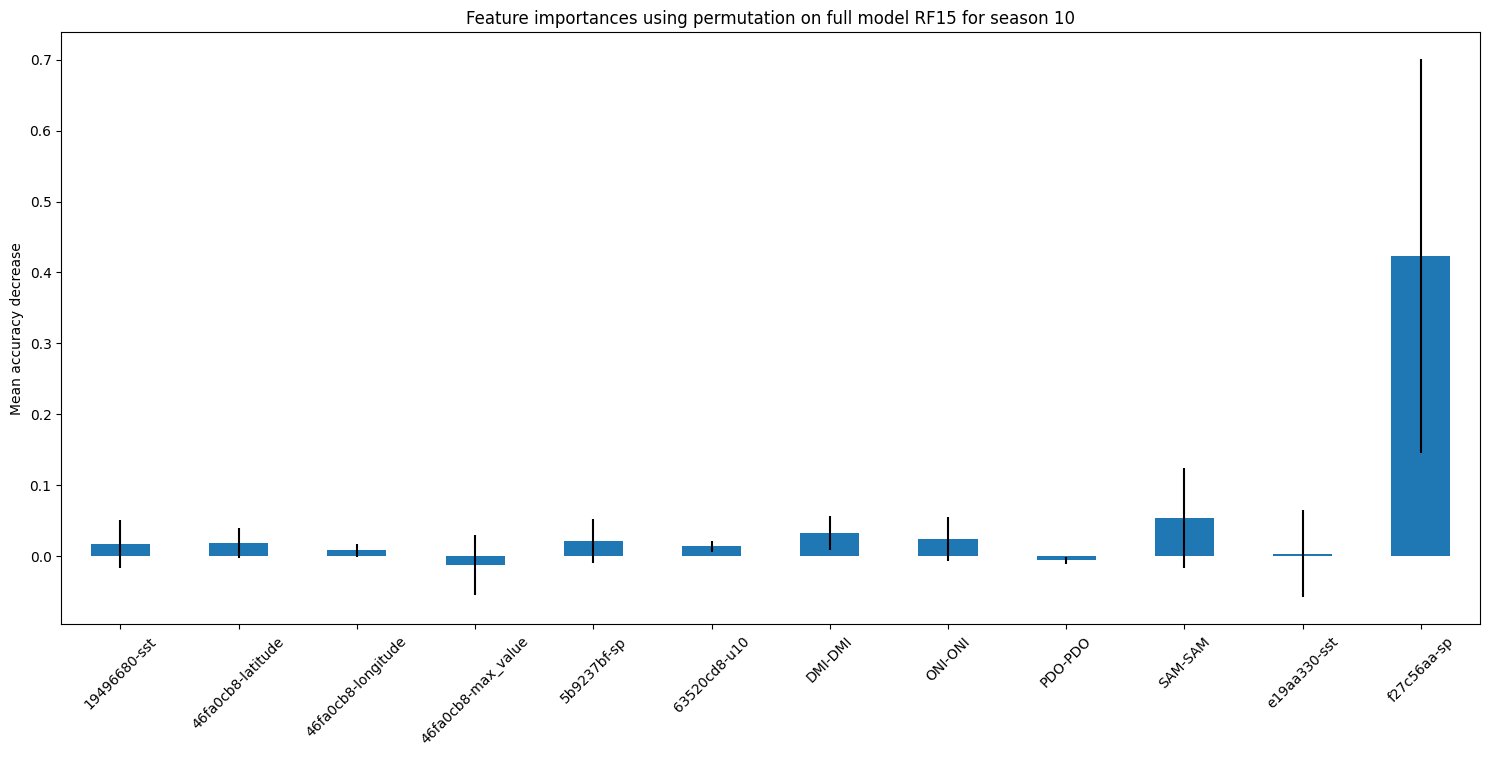

In [13]:
exp.get_feature_importance(season, "RF15", method="permutation")

In [14]:
id = "5cb3fa02"
season = 1
exp = train_single_label_exp(id, season, "HWN",XGBRegressor(booster="gblinear",random_state=42, n_estimators=15, learning_rate=0.1), "XGBL15", "california")

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
fde0e327,index_fde0e327.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
340e2882,index_340e2882.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
f27c56aa,index_f27c56aa.parquet,anom,1,SP,236|246|37.5|43,1980-2010,1972-2022
5b9237bf,index_5b9237bf.parquet,anom,1,SP,236|246|32|37.5,1980-2010,1972-2022
46fa0cb8,index_46fa0cb8.parquet,max,1,SP,190|235|15|43,NoRef,1972-2022
63520cd8,index_63520cd8.parquet,anom,1,U10,236|246|32|43,1980-2010,1972-2022
PDO,pdo.dat,EOF,1,SSTAnom,110|260|20|70,unknown,1972-2022
ONI,oni.txt,Anom,3,SST,190|240|-5|5,30yearsliding,1972-2022
SAM,sam.txt,DifAnom,1,SLP,X|X|-65|-40,1981-2010,1972-2022


,Model,Season,Metric,Stage,HWN,Average
0,XGBL15,1,r2,TSCV,3.210436e-01,3.210436e-01
0,XGBL15,1,mape,TSCV,3.439544e+14,3.439544e+14


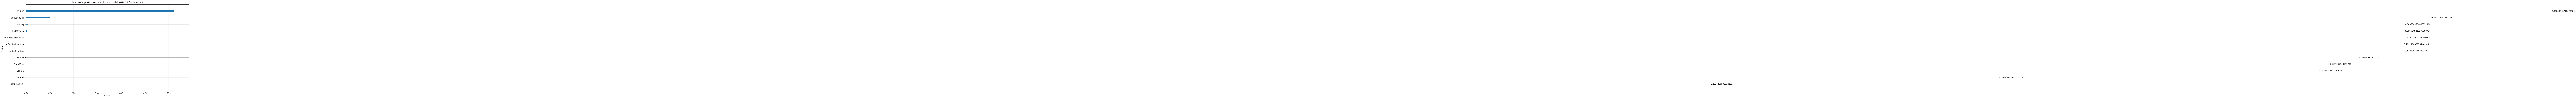

In [15]:
exp.get_feature_importance(season, "XGBL15", method="xgboost", xgbtype="weight")

## Chile

In [16]:
region = "chile"
metadata_exp_path = f"data/climate_features/{region}/metadata.csv"
metadata = pd.read_csv(metadata_exp_path)
metadata.rename(columns={"id":"id_data"}, inplace=True)
metadata

,id_data,filename,season,indices
0,978f49d7,predictor_978f49d7_1.parquet,1,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
1,978f49d7,predictor_978f49d7_2.parquet,2,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
2,978f49d7,predictor_978f49d7_3.parquet,3,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
3,978f49d7,predictor_978f49d7_4.parquet,4,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
4,978f49d7,predictor_978f49d7_5.parquet,5,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
...,...,...,...,...
247,458d357c,predictor_458d357c_8.parquet,8,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...
248,458d357c,predictor_458d357c_9.parquet,9,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...
249,458d357c,predictor_458d357c_10.parquet,10,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...
250,458d357c,predictor_458d357c_11.parquet,11,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...


In [17]:
results = pd.read_csv(f"data/climate_results/{region}_results/results.csv")
results

,model,season,metric,stage,HWN,HWF,HWD,HWM,HWA,Average,id_data
0,Linear,1,r2,prediction,-0.554116,-0.486005,-0.552474,-0.218203,0.159549,-0.330250,f2a9d7a9
1,RF5,1,r2,prediction,-2.092453,-1.222445,-1.278692,-1.576388,-1.808586,-1.595713,f2a9d7a9
2,RF10,1,r2,prediction,-2.115566,-1.331914,-1.299212,-1.166963,-1.257346,-1.434200,f2a9d7a9
3,SVR-rbf,1,r2,prediction,-0.851649,-1.454943,-0.961584,-0.719468,-1.239079,-1.045345,f2a9d7a9
4,XGB10,1,r2,prediction,-0.529037,-0.922681,-0.347076,-2.099681,-2.939683,-1.367632,f2a9d7a9
...,...,...,...,...,...,...,...,...,...,...,...
41563,CNNRNN16,10,mape,TSCV,1.494253,3.204215,1.659208,1.983070,1.999369,2.068023,458d357c
41564,SLSTM16,11,mape,TSCV,0.557611,0.536565,0.520315,0.580072,0.763671,0.591647,458d357c
41565,CNNRNN16,11,mape,TSCV,0.698137,0.746954,0.968459,0.837303,1.113771,0.872925,458d357c
41566,SLSTM16,12,mape,TSCV,1.246099,0.997842,1.308358,2.024362,8.793579,2.874048,458d357c


In [18]:
display_full(results[(results["id_data"]=="8359c65d") & (results["season"]==12)])

,model,season,metric,stage,HWN,HWF,HWD,HWM,HWA,Average,id_data
30067,Linear,12,r2,prediction,3.389006e-01,3.599228e-01,1.347305e-01,4.096794e-01,4.970747e-01,3.480616e-01,8359c65d
30068,RF5,12,r2,prediction,2.237762e-02,4.117218e-01,5.068929e-02,-2.137130e-01,-4.999397e-02,4.421636e-02,8359c65d
30069,RF10,12,r2,prediction,-2.330420e-01,2.082726e-01,-5.564687e-02,-1.784204e-01,-1.077556e-01,-7.331844e-02,8359c65d
30070,RF15,12,r2,prediction,-2.444444e-01,1.321182e-01,-4.501002e-02,-1.989612e-01,-1.068393e-01,-9.262734e-02,8359c65d
30071,SVR-rbf,12,r2,prediction,-9.603221e-02,-1.159041e-01,-1.181098e-01,-3.910796e-01,-2.411268e-01,-1.924505e-01,8359c65d
30072,SVR-linear,12,r2,prediction,4.071969e-01,2.132330e-01,2.895946e-01,2.267336e-01,2.861285e-01,2.845773e-01,8359c65d
30073,SVR-cubic,12,r2,prediction,4.154198e-02,-3.739199e-01,-3.457360e-01,-7.162628e-02,-2.577112e-01,-2.014903e-01,8359c65d
30074,XGBL5,12,r2,prediction,-2.988090e-01,-1.738207e-01,-2.163151e-01,-2.422891e-01,-2.568499e-01,-2.376168e-01,8359c65d
30075,XGBL10,12,r2,prediction,-1.364179e-01,-6.917605e-03,-8.162957e-02,-1.507706e-01,-1.392603e-01,-1.029992e-01,8359c65d
30076,XGBL15,12,r2,prediction,-3.436890e-02,8.710888e-02,-2.312806e-02,-1.106706e-01,-7.254263e-02,-3.072026e-02,8359c65d


In [19]:
# Example usage
summary_r2 = summarize_best_results_by_index(results, metadata, metric="r2", top_n=2, stage="prediction")
summary_mape = summarize_best_results_by_index(results, metadata, metric="mape", top_n=1, stage="prediction")
summary_cv_r2 = summarize_best_results_by_index(results, metadata, metric="r2", top_n=1, stage="CV")
summary_cv_mape = summarize_best_results_by_index(results, metadata, metric="mape", top_n=1, stage="CV")
summary_tscv_r2 = summarize_best_results_by_index(results, metadata, metric="r2", top_n=3, stage="TSCV")
summary_tscv_mape = summarize_best_results_by_index(results, metadata, metric="mape", top_n=1, stage="TSCV")


In [20]:
summary_tscv_r2

,model,season,id_data,index,best_value,filename,indices
0,CNNRNN16,12,13a24caf,Average,0.848484,predictor_13a24caf_12.parquet,fde0e327-340e2882-a5df415f-c6184040-c1c59e4d-8...
1,SLSTM16,10,9f8163e4,Average,0.813859,predictor_9f8163e4_10.parquet,fde0e327-340e2882-8c5bce37-880b8b63-c6b80290-3...
2,MLP16,12,f2a9d7a9,Average,0.800753,NaN,NaN
3,CNNRNN16,12,13a24caf,HWA,0.829530,predictor_13a24caf_12.parquet,fde0e327-340e2882-a5df415f-c6184040-c1c59e4d-8...
4,SLSTM16,12,69ae08a8,HWA,0.815933,predictor_69ae08a8_12.parquet,fde0e327-340e2882-b91ccd4e-c6184040-c1c59e4d-8...
5,CNNRNN16,12,4effa258,HWA,0.809104,predictor_4effa258_12.parquet,fde0e327-340e2882-a5df415f-c6184040-c1c59e4d-8...
6,CNNRNN16,12,13a24caf,HWD,0.874582,predictor_13a24caf_12.parquet,fde0e327-340e2882-a5df415f-c6184040-c1c59e4d-8...
7,SLSTM16,5,458d357c,HWD,0.871058,predictor_458d357c_5.parquet,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...
8,LSTM16,10,50a3f070,HWD,0.844396,predictor_50a3f070_10.parquet,fde0e327-340e2882-b91ccd4e-c6184040-c1c59e4d-8...
9,SLSTM16,10,9f8163e4,HWF,0.908602,predictor_9f8163e4_10.parquet,fde0e327-340e2882-8c5bce37-880b8b63-c6b80290-3...


In [21]:
cv_r2_seasons = {}
cv_mape_seasons = {}
r2_seasons = {}
mape_seasons = {}
tscv_r2_seasons = {}
tscv_mape_seasons = {}
for i in range(13):
    results_season = results[results["season"]==i]
    cv_r2_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="r2",stage="CV" , top_n=1)
    tscv_r2_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="r2",stage="TSCV" , top_n=1)
    r2_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="r2",stage="prediction", top_n=1)
    mape_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mape",stage="prediction", top_n=1)
    cv_mape_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mape",stage="CV", top_n=1)
    tscv_mape_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mape",stage="TSCV", top_n=1)

cv_r2_seasons = pd.concat(list(cv_r2_seasons.values()))
cv_mape_seasons = pd.concat(list(cv_mape_seasons.values()))
tscv_r2_seasons = pd.concat(list(tscv_r2_seasons.values()))
tscv_mape_seasons = pd.concat(list(tscv_mape_seasons.values()))
r2_seasons = pd.concat(list(r2_seasons.values()))
mape_seasons = pd.concat(list(mape_seasons.values()))


In [22]:
df = tscv_r2_seasons
display_full(df[df["best_value"] > 0])
# display_full(df)

,model,index,best_value,id_data,filename,season,indices
0,CNNRNN16,Average,0.378731,511854f2,predictor_511854f2_1.parquet,1,fde0e327-340e2882-b91ccd4e-c6184040-c1c59e4d-8...
1,CNNRNN16,HWA,0.419924,511854f2,predictor_511854f2_1.parquet,1,fde0e327-340e2882-b91ccd4e-c6184040-c1c59e4d-8...
2,CNNRNN16,HWD,0.245666,511854f2,predictor_511854f2_1.parquet,1,fde0e327-340e2882-b91ccd4e-c6184040-c1c59e4d-8...
3,CNNRNN16,HWF,0.122375,511854f2,predictor_511854f2_1.parquet,1,fde0e327-340e2882-b91ccd4e-c6184040-c1c59e4d-8...
4,CNNRNN16,HWM,0.620996,511854f2,predictor_511854f2_1.parquet,1,fde0e327-340e2882-b91ccd4e-c6184040-c1c59e4d-8...
5,CNNRNN16,HWN,0.484691,511854f2,predictor_511854f2_1.parquet,1,fde0e327-340e2882-b91ccd4e-c6184040-c1c59e4d-8...
0,SLSTM16,Average,0.311478,30ab9bad,predictor_30ab9bad_2.parquet,2,fde0e327-340e2882-880b8b63-aa75d48e-88249a81-f...
1,SRNN16,HWA,0.676405,69ae08a8,predictor_69ae08a8_2.parquet,2,fde0e327-340e2882-b91ccd4e-c6184040-c1c59e4d-8...
2,CNNRNN16,HWD,0.061853,d7101242,predictor_d7101242_2.parquet,2,fde0e327-340e2882-13e2f761-aa75d48e-2748fd3a-f...
3,SLSTM16,HWF,0.381016,30ab9bad,predictor_30ab9bad_2.parquet,2,fde0e327-340e2882-880b8b63-aa75d48e-88249a81-f...


## Analyze good results by experiment

In [23]:
successful_ids = tscv_r2_seasons[tscv_r2_seasons["best_value"]>=0.8]["id_data"]
successful_ids

2    458d357c
3    311dd366
2    9f8163e4
3    9f8163e4
5    9f8163e4
0    9f8163e4
2    50a3f070
3    9f8163e4
5    9f8163e4
0    13a24caf
1    13a24caf
2    13a24caf
3    13a24caf
4    13a24caf
5    4d17ba1a
Name: id_data, dtype: object

In [24]:
get_info_experiment("9bd58418", metadata_exp_path=metadata_exp_path, metadata_index_path=my_indices_path, extra_indices_path=extra_indices_path)

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
fde0e327,index_fde0e327.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
340e2882,index_340e2882.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
b91ccd4e,index_b91ccd4e.parquet,max,1,MSL,245|284|-45|-15,NoRef,1972-2022
c6184040,index_c6184040.parquet,anom,1,U,282|289|-34|-30,1980-2010,1972-2022
c1c59e4d,index_c1c59e4d.parquet,anom,1,U,289|290.5|-34|-30,1980-2010,1972-2022
8c4a4c9c,index_8c4a4c9c.parquet,anom,1,U,282|289|-38|-34,1980-2010,1972-2022
cb76aaa7,index_cb76aaa7.parquet,anom,1,U,282|288.5|-43|-38,1980-2010,1972-2022
d416bd24,index_d416bd24.parquet,anom,1,U,282|288.5|-53|-43,1980-2010,1972-2022
b259d0dd,index_b259d0dd.parquet,anom,1,MSL,282|290.5|-34|-30,1980-2010,1972-2022


In [25]:
get_info_experiment("13a24caf", metadata_exp_path=metadata_exp_path, metadata_index_path=my_indices_path, extra_indices_path=extra_indices_path)

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
fde0e327,index_fde0e327.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
340e2882,index_340e2882.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
a5df415f,index_a5df415f.parquet,max,1,MSL,245|284|-45|-15,1980-2010,1972-2022
c6184040,index_c6184040.parquet,anom,1,U,282|289|-34|-30,1980-2010,1972-2022
c1c59e4d,index_c1c59e4d.parquet,anom,1,U,289|290.5|-34|-30,1980-2010,1972-2022
8c4a4c9c,index_8c4a4c9c.parquet,anom,1,U,282|289|-38|-34,1980-2010,1972-2022
cb76aaa7,index_cb76aaa7.parquet,anom,1,U,282|288.5|-43|-38,1980-2010,1972-2022
d416bd24,index_d416bd24.parquet,anom,1,U,282|288.5|-53|-43,1980-2010,1972-2022
b259d0dd,index_b259d0dd.parquet,anom,1,MSL,282|290.5|-34|-30,1980-2010,1972-2022


In [ ]:
get_info_experiment("511854f2", metadata_exp_path=metadata_exp_path, metadata_index_path=my_indices_path, extra_indices_path=extra_indices_path)

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
fde0e327,index_fde0e327.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
340e2882,index_340e2882.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
b91ccd4e,index_b91ccd4e.parquet,max,1,MSL,245|284|-45|-15,NoRef,1972-2022
c6184040,index_c6184040.parquet,anom,1,U,282|289|-34|-30,1980-2010,1972-2022
c1c59e4d,index_c1c59e4d.parquet,anom,1,U,289|290.5|-34|-30,1980-2010,1972-2022
8c4a4c9c,index_8c4a4c9c.parquet,anom,1,U,282|289|-38|-34,1980-2010,1972-2022
cb76aaa7,index_cb76aaa7.parquet,anom,1,U,282|288.5|-43|-38,1980-2010,1972-2022
d416bd24,index_d416bd24.parquet,anom,1,U,282|288.5|-53|-43,1980-2010,1972-2022
b259d0dd,index_b259d0dd.parquet,anom,1,MSL,282|290.5|-34|-30,1980-2010,1972-2022


### Old (non NN) results

In [ ]:
id = "9bd58418"
season = 12
label = "HWN"
model = SVR(kernel='linear', max_iter=200)
name = "SVR-linear"
exp = train_single_label_exp(id, season, label, model, name, region)

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
fde0e327,index_fde0e327.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
340e2882,index_340e2882.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
b91ccd4e,index_b91ccd4e.parquet,max,1,MSL,245|284|-45|-15,NoRef,1972-2022
c6184040,index_c6184040.parquet,anom,1,U,282|289|-34|-30,1980-2010,1972-2022
c1c59e4d,index_c1c59e4d.parquet,anom,1,U,289|290.5|-34|-30,1980-2010,1972-2022
8c4a4c9c,index_8c4a4c9c.parquet,anom,1,U,282|289|-38|-34,1980-2010,1972-2022
cb76aaa7,index_cb76aaa7.parquet,anom,1,U,282|288.5|-43|-38,1980-2010,1972-2022
d416bd24,index_d416bd24.parquet,anom,1,U,282|288.5|-53|-43,1980-2010,1972-2022
b259d0dd,index_b259d0dd.parquet,anom,1,MSL,282|290.5|-34|-30,1980-2010,1972-2022


c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Model,Season,Metric,Stage,HWN,Average
0,SVR-linear,12,r2,TSCV,4.709557e-01,4.709557e-01
0,SVR-linear,12,mape,TSCV,1.846126e+14,1.846126e+14


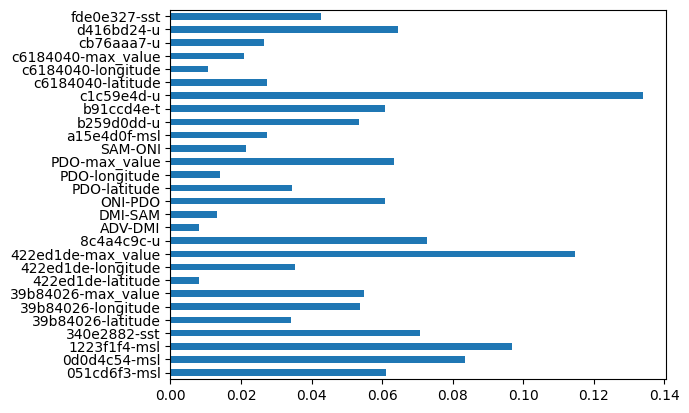

In [ ]:
exp.get_feature_importance(season, name, method="svm")

In [ ]:
id = "311dd366"
season=12
label = "HWF"
model = SVR(kernel='linear', max_iter=200)
name = "SVR-linear"
exp = train_single_label_exp(id, season, label, model, name, region)

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
fde0e327,index_fde0e327.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
340e2882,index_340e2882.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
8c5bce37,index_8c5bce37.parquet,anom,1,T,286|288|-42|-33,1980-2010,1972-2022
880b8b63,index_880b8b63.parquet,max,1,MSL,260|284|-44|-17,NoRef,1972-2022
aa75d48e,index_aa75d48e.parquet,anom,1,U,287|289|-42|-33,1980-2010,1972-2022
88249a81,index_88249a81.parquet,anom,1,MSL,286|292|-52|-40,1980-2010,1972-2022
f6e4a28a,index_f6e4a28a.parquet,anom,1,MSL,286|288.5|-33|-28,1980-2010,1972-2022
7728bf70,index_7728bf70.parquet,anom,1,MSL,280|286|-38|-30,1980-2010,1972-2022
a66b8219,index_a66b8219.parquet,anom,1,MSL,291|295|-38|-30,1980-2010,1972-2022


c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Model,Season,Metric,Stage,HWF,Average
0,SVR-linear,12,r2,TSCV,3.823067e-01,3.823067e-01
0,SVR-linear,12,mape,TSCV,6.057313e+14,6.057313e+14


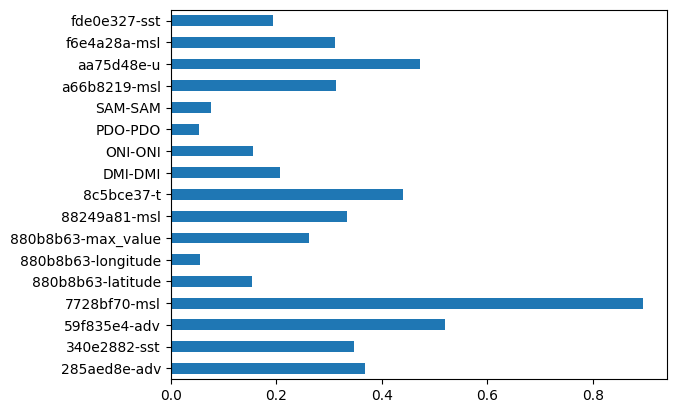

In [ ]:
exp.get_feature_importance(season, "SVR-linear", method="svm")

In [ ]:
id = "3df87a13"
season = 12
label = "HWD"
model = SVR(kernel='linear', max_iter=200)
name = "SVR-linear"
exp = train_single_label_exp(id, season, label, model, name, region)

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
fde0e327,index_fde0e327.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
340e2882,index_340e2882.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
880b8b63,index_880b8b63.parquet,max,1,MSL,260|284|-44|-17,NoRef,1972-2022
aa75d48e,index_aa75d48e.parquet,anom,1,U,287|289|-42|-33,1980-2010,1972-2022
88249a81,index_88249a81.parquet,anom,1,MSL,286|292|-52|-40,1980-2010,1972-2022
f6e4a28a,index_f6e4a28a.parquet,anom,1,MSL,286|288.5|-33|-28,1980-2010,1972-2022
7728bf70,index_7728bf70.parquet,anom,1,MSL,280|286|-38|-30,1980-2010,1972-2022
a66b8219,index_a66b8219.parquet,anom,1,MSL,291|295|-38|-30,1980-2010,1972-2022
285aed8e,index_285aed8e.parquet,anom,1,ADV,282|286|-42|-33,1980-2010,1972-2022


c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Model,Season,Metric,Stage,HWD,Average
0,SVR-linear,12,r2,TSCV,3.517485e-01,3.517485e-01
0,SVR-linear,12,mape,TSCV,3.857294e+14,3.857294e+14


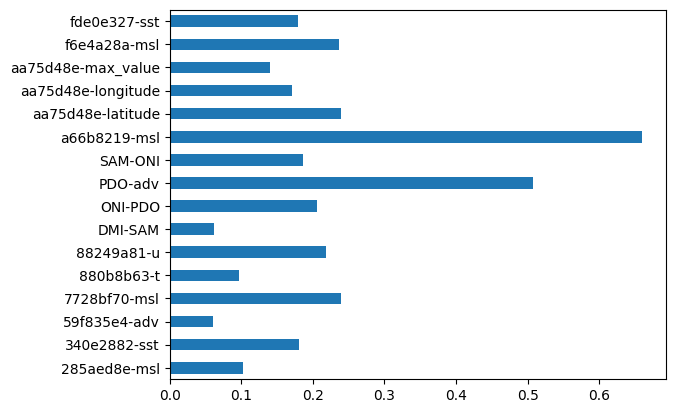

In [ ]:
exp.get_feature_importance(season, name, method="svm")

In [ ]:
id = "9f8163e4"
season = 12
label = "HWD"
model = SVR(kernel='linear', max_iter=200)
name = "SVR-linear"
exp = train_single_label_exp(id, season, label, model, name, region)

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
fde0e327,index_fde0e327.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
340e2882,index_340e2882.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
8c5bce37,index_8c5bce37.parquet,anom,1,T,286|288|-42|-33,1980-2010,1972-2022
880b8b63,index_880b8b63.parquet,max,1,MSL,260|284|-44|-17,NoRef,1972-2022
c6b80290,index_c6b80290.parquet,anom,1,U,287.5|289.5|-37|-33,1980-2010,1972-2022
3111321a,index_3111321a.parquet,anom,1,U,286.5|288.5|-42|-37,1980-2010,1972-2022
88249a81,index_88249a81.parquet,anom,1,MSL,286|292|-52|-40,1980-2010,1972-2022
f6e4a28a,index_f6e4a28a.parquet,anom,1,MSL,286|288.5|-33|-28,1980-2010,1972-2022
7728bf70,index_7728bf70.parquet,anom,1,MSL,280|286|-38|-30,1980-2010,1972-2022


c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Model,Season,Metric,Stage,HWD,Average
0,SVR-linear,12,r2,TSCV,3.579722e-01,3.579722e-01
0,SVR-linear,12,mape,TSCV,4.831125e+14,4.831125e+14


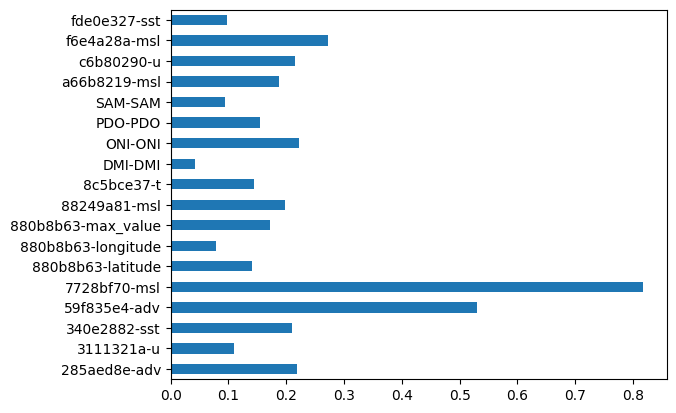

In [ ]:
exp.get_feature_importance(season, name, "svm")

In [ ]:
id = "978f49d7"
season = 12
label = "HWD"
model = SVR(kernel='linear', max_iter=200)
name = "SVR-linear"
exp = train_single_label_exp(id, season, label, model, name, region)

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
fde0e327,index_fde0e327.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
340e2882,index_340e2882.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
43701738,index_43701738.parquet,anom,1,SP,282|290|-34|-30,1980-2010,1972-2022
e306f58b,index_e306f58b.parquet,anom,1,SP,282|290|-38|-34,1980-2010,1972-2022
e601b072,index_e601b072.parquet,anom,1,SP,282|290|-43|-38,1980-2010,1972-2022
ecaf68aa,index_ecaf68aa.parquet,anom,1,SP,282|290|-56|-43,1980-2010,1972-2022
711b08fc,index_711b08fc.parquet,max,1,SP,220|280|-35|-10,NoRef,1972-2022
89595d7b,index_89595d7b.parquet,anom,1,U10,282|290|-37|-30,1980-2010,1972-2022
PDO,pdo.dat,EOF,1,SSTAnom,110|260|20|70,unknown,1972-2022


c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Model,Season,Metric,Stage,HWD,Average
0,SVR-linear,12,r2,TSCV,-1.120256e+00,-1.120256e+00
0,SVR-linear,12,mape,TSCV,6.367123e+14,6.367123e+14


In [ ]:
id = "13a24caf"
get_info_experiment(id, metadata_exp_path, my_indices_path, extra_indices_path)

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
fde0e327,index_fde0e327.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
340e2882,index_340e2882.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
a5df415f,index_a5df415f.parquet,max,1,MSL,245|284|-45|-15,1980-2010,1972-2022
c6184040,index_c6184040.parquet,anom,1,U,282|289|-34|-30,1980-2010,1972-2022
c1c59e4d,index_c1c59e4d.parquet,anom,1,U,289|290.5|-34|-30,1980-2010,1972-2022
8c4a4c9c,index_8c4a4c9c.parquet,anom,1,U,282|289|-38|-34,1980-2010,1972-2022
cb76aaa7,index_cb76aaa7.parquet,anom,1,U,282|288.5|-43|-38,1980-2010,1972-2022
d416bd24,index_d416bd24.parquet,anom,1,U,282|288.5|-53|-43,1980-2010,1972-2022
b259d0dd,index_b259d0dd.parquet,anom,1,MSL,282|290.5|-34|-30,1980-2010,1972-2022
